Homework 4
===
***
- 작성자 : B889047 윤준호
- 작성일 : 2022 / 11 /26, 일
***

## Problem #1 : Name Resolution

Q : Consider the three (undocumented) classes below, together with their line numbers. 

In [1]:
class A(object):
    x = 5
    def __init__(self):
        self.x = x + 3
        
    def foo(self,x):
        self.y = self.x
        self.z = x

class B(A):
    x = 10
    def __init__(self,x):
        self.foo(x-1)
    
    def bar(self,y):
        self.y = 4 * x
        self.z = self.x

class C(B):
    y = 15
    def __init__(self,x):
        super().__init__(x + 1)
    
    def foo(self,y):
        self.y = 2 * self.x
        self.z = 3 * y

A : Show the class folders in heap space for these three classes.

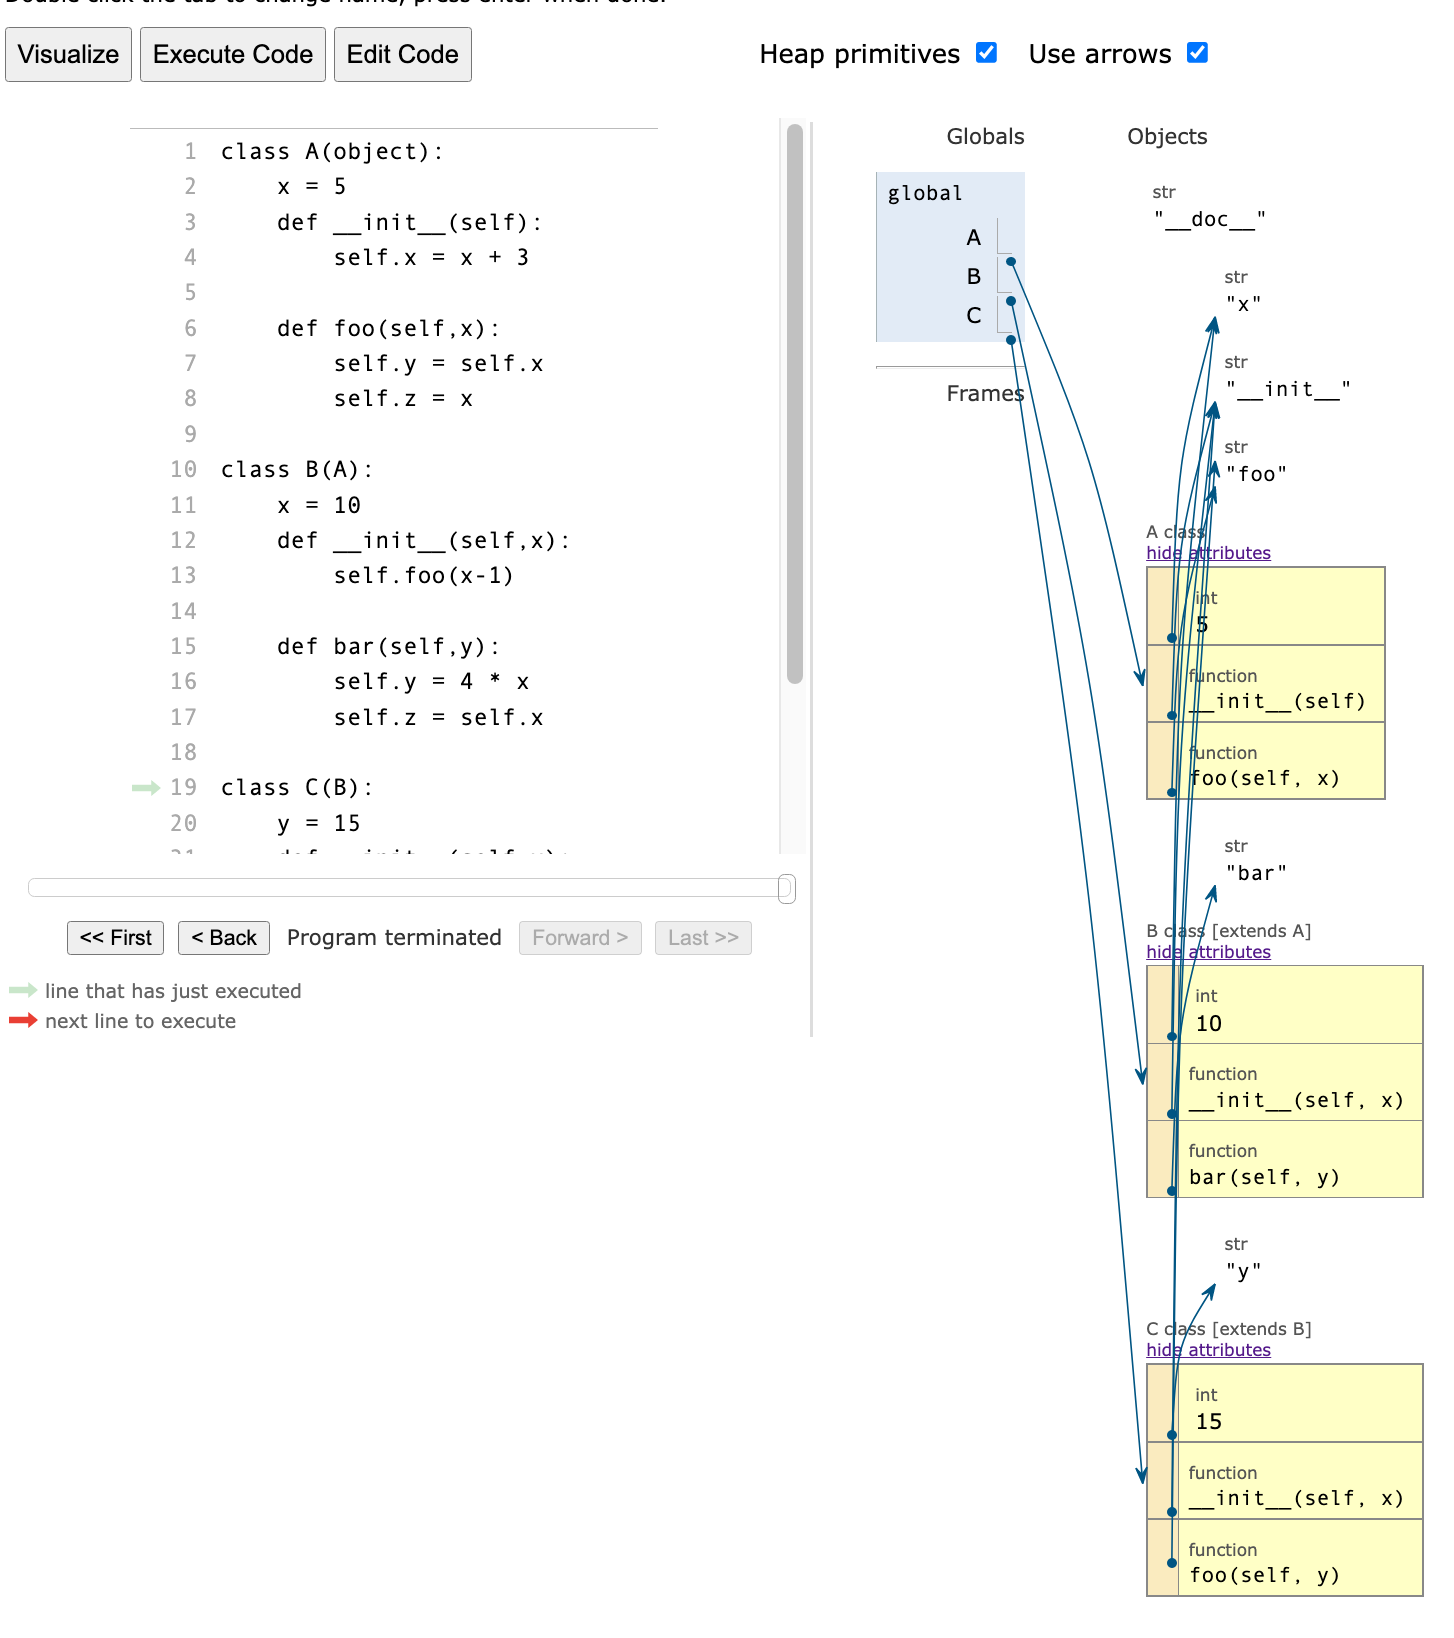

B : Show the memory space (call stack and heap space) for the following call

```python
c = C(3)
```

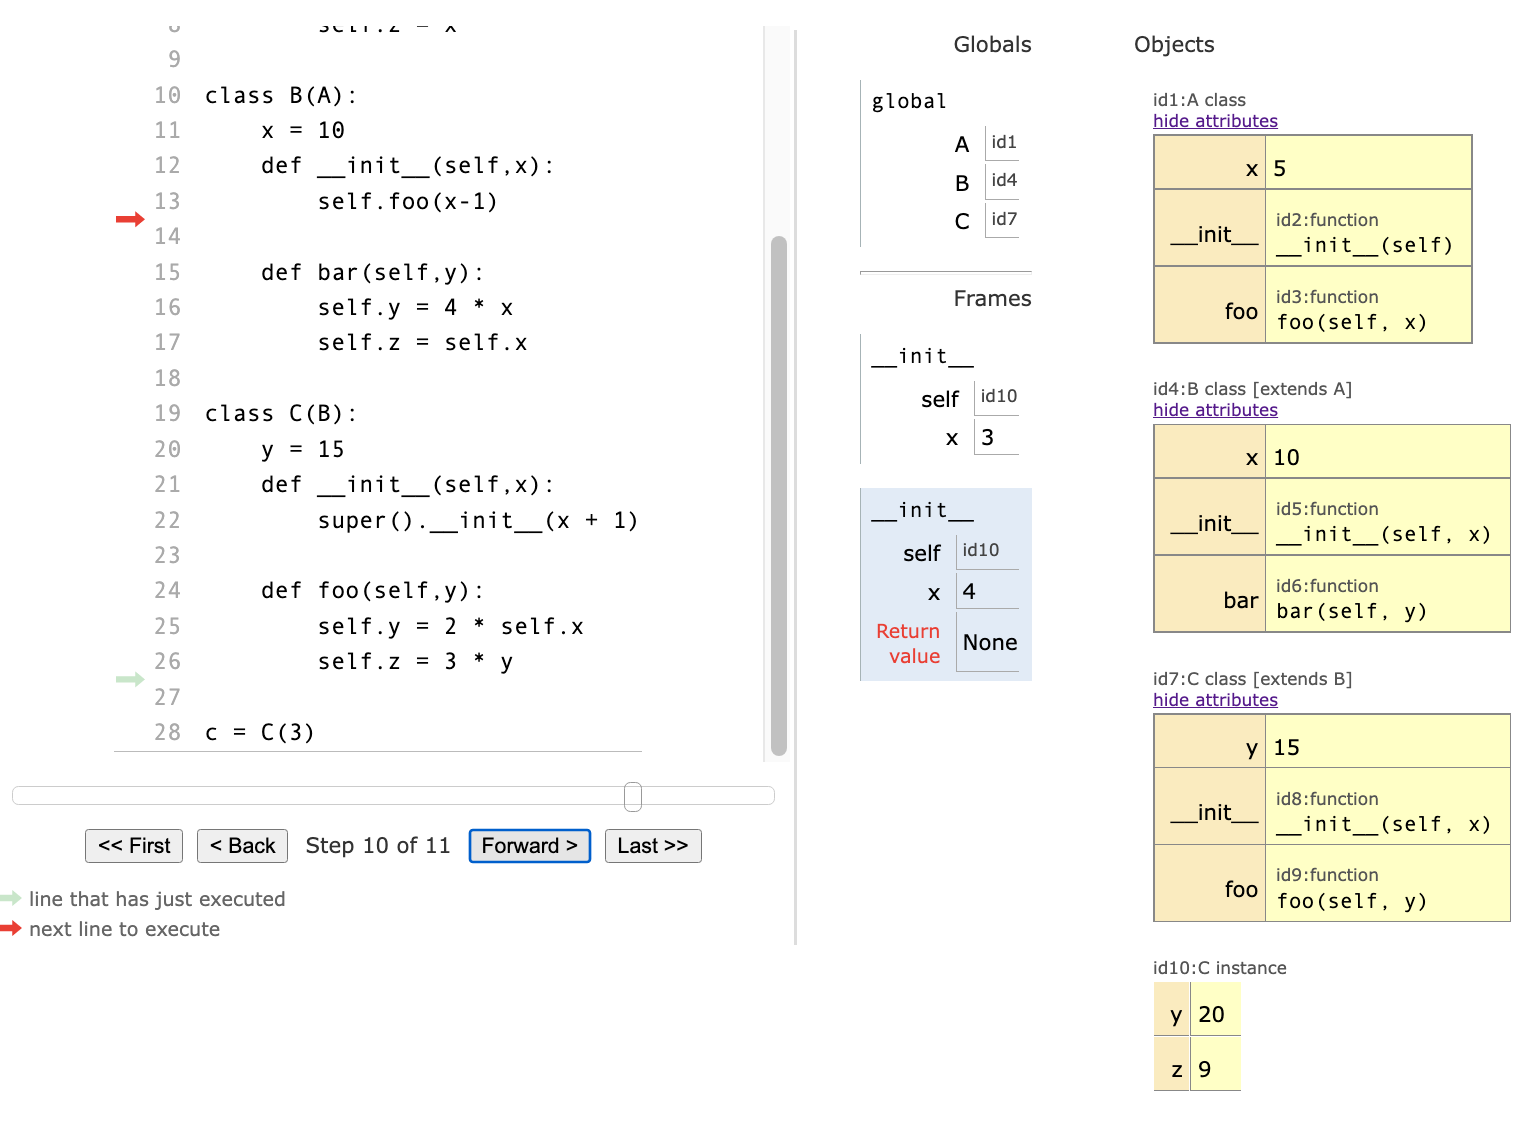

## Problem #2 : Inheritance

Q : Run with Python Tutor and show both call stack and heap space after each statement for a , b
and c. Make sure you understand how they work. 

In [2]:
class A(object):
    d = 10
    
    def __init__(self,n):
        self.n = n
        self.m = 0
        A.d += 1

class B(A):
    d = 20
    
    def __init__(self,n):
        super().__init__(n)
        self.p = 2

class C(A):
    f = 8
    
    def __init__(self,n):
        self.r = n

a = A(1)
b = B(1)
c = C(3)

- statement 'a'

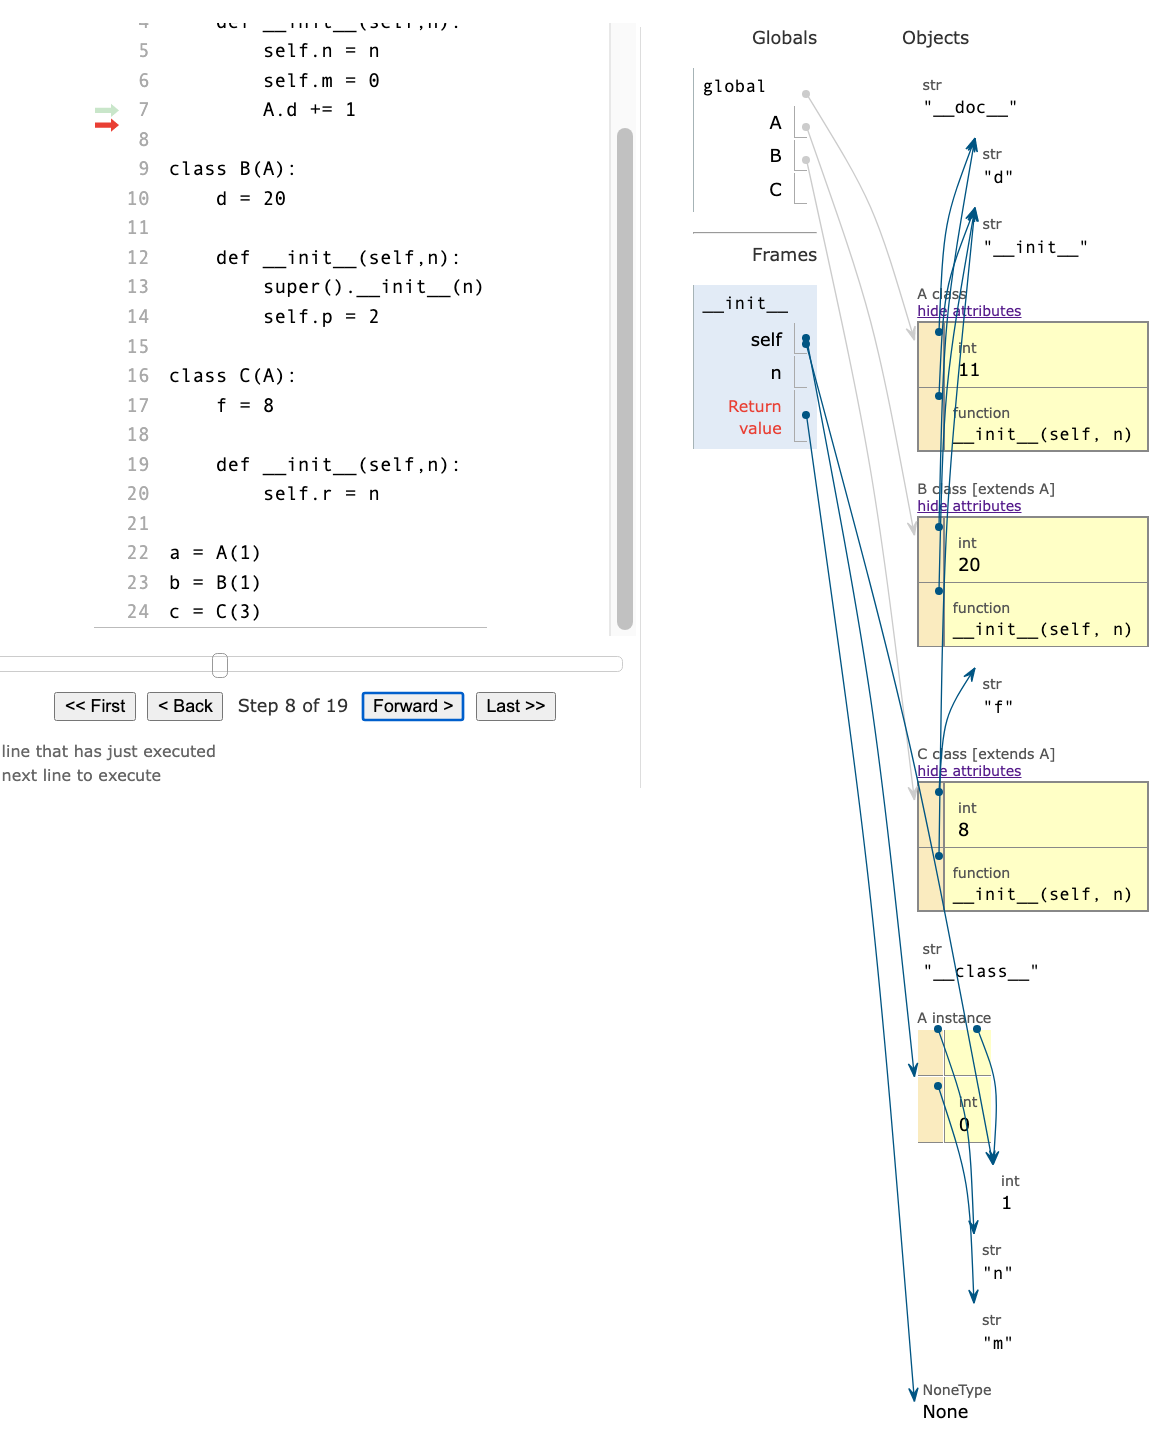

- statement 'b'

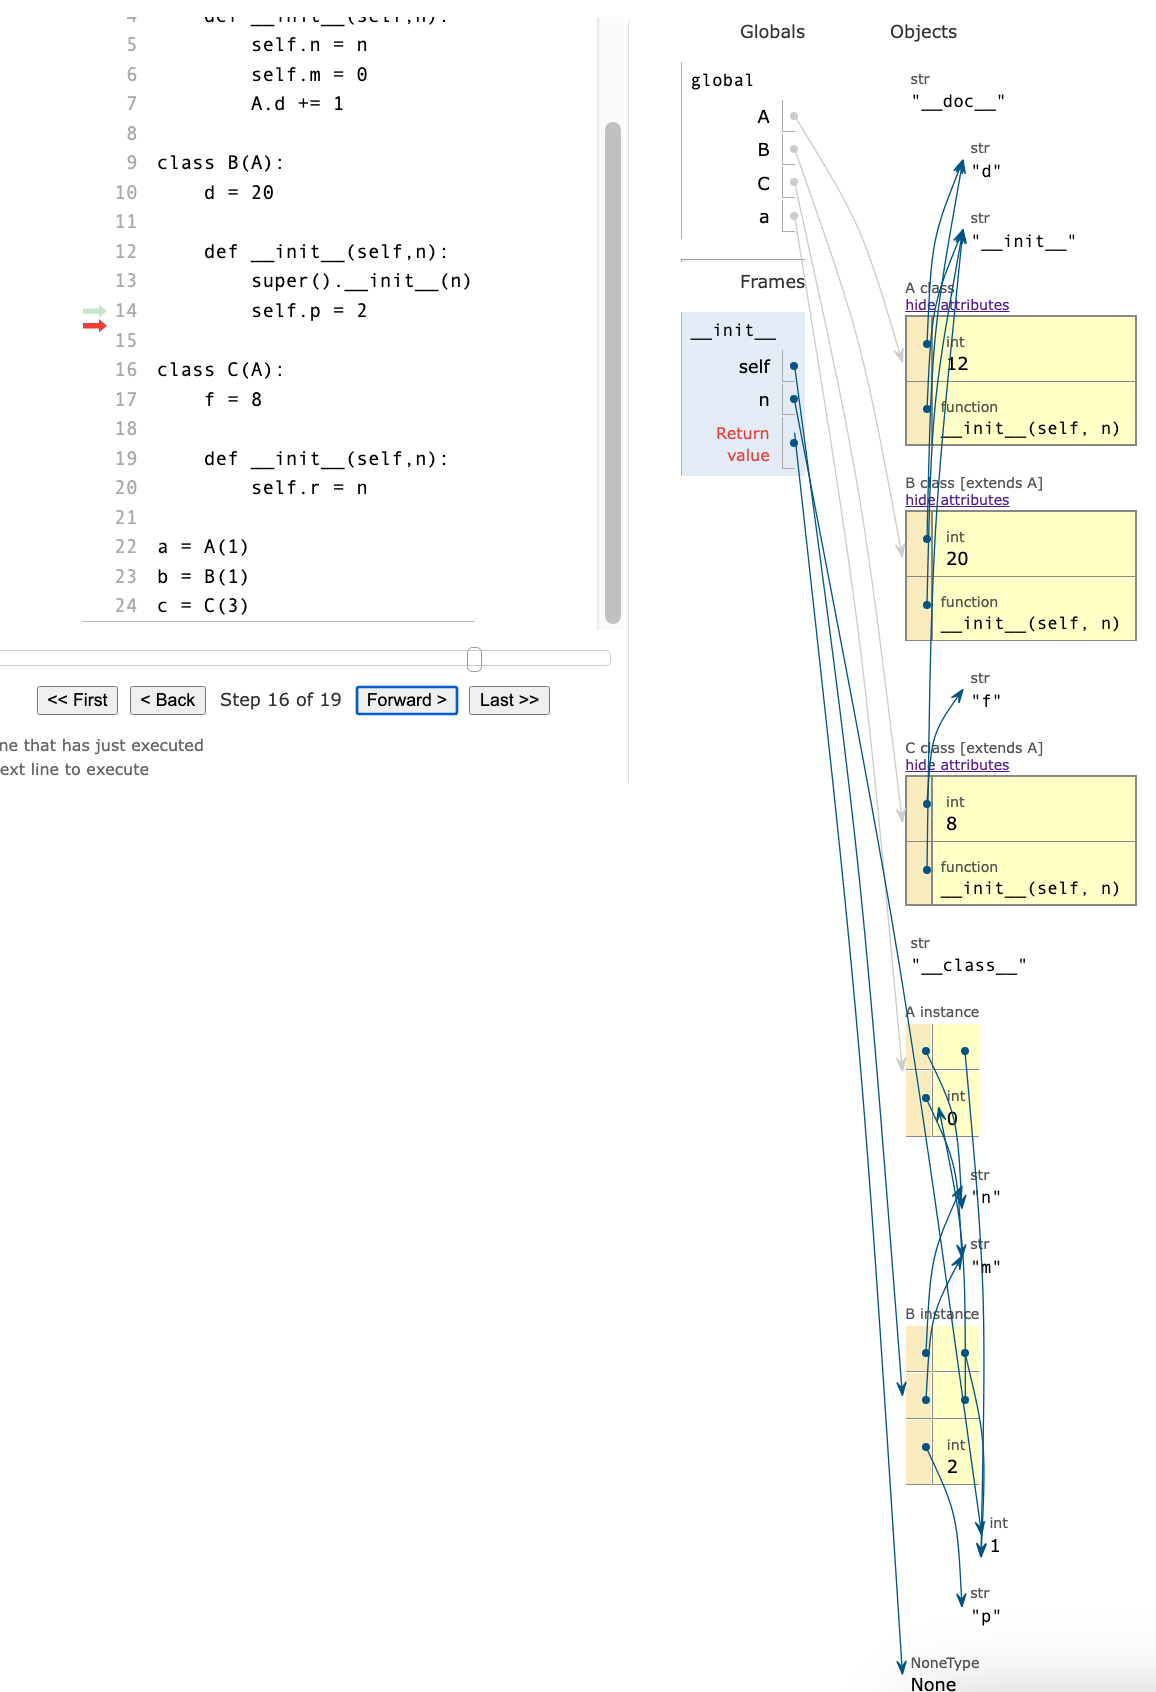

- statement 'c'

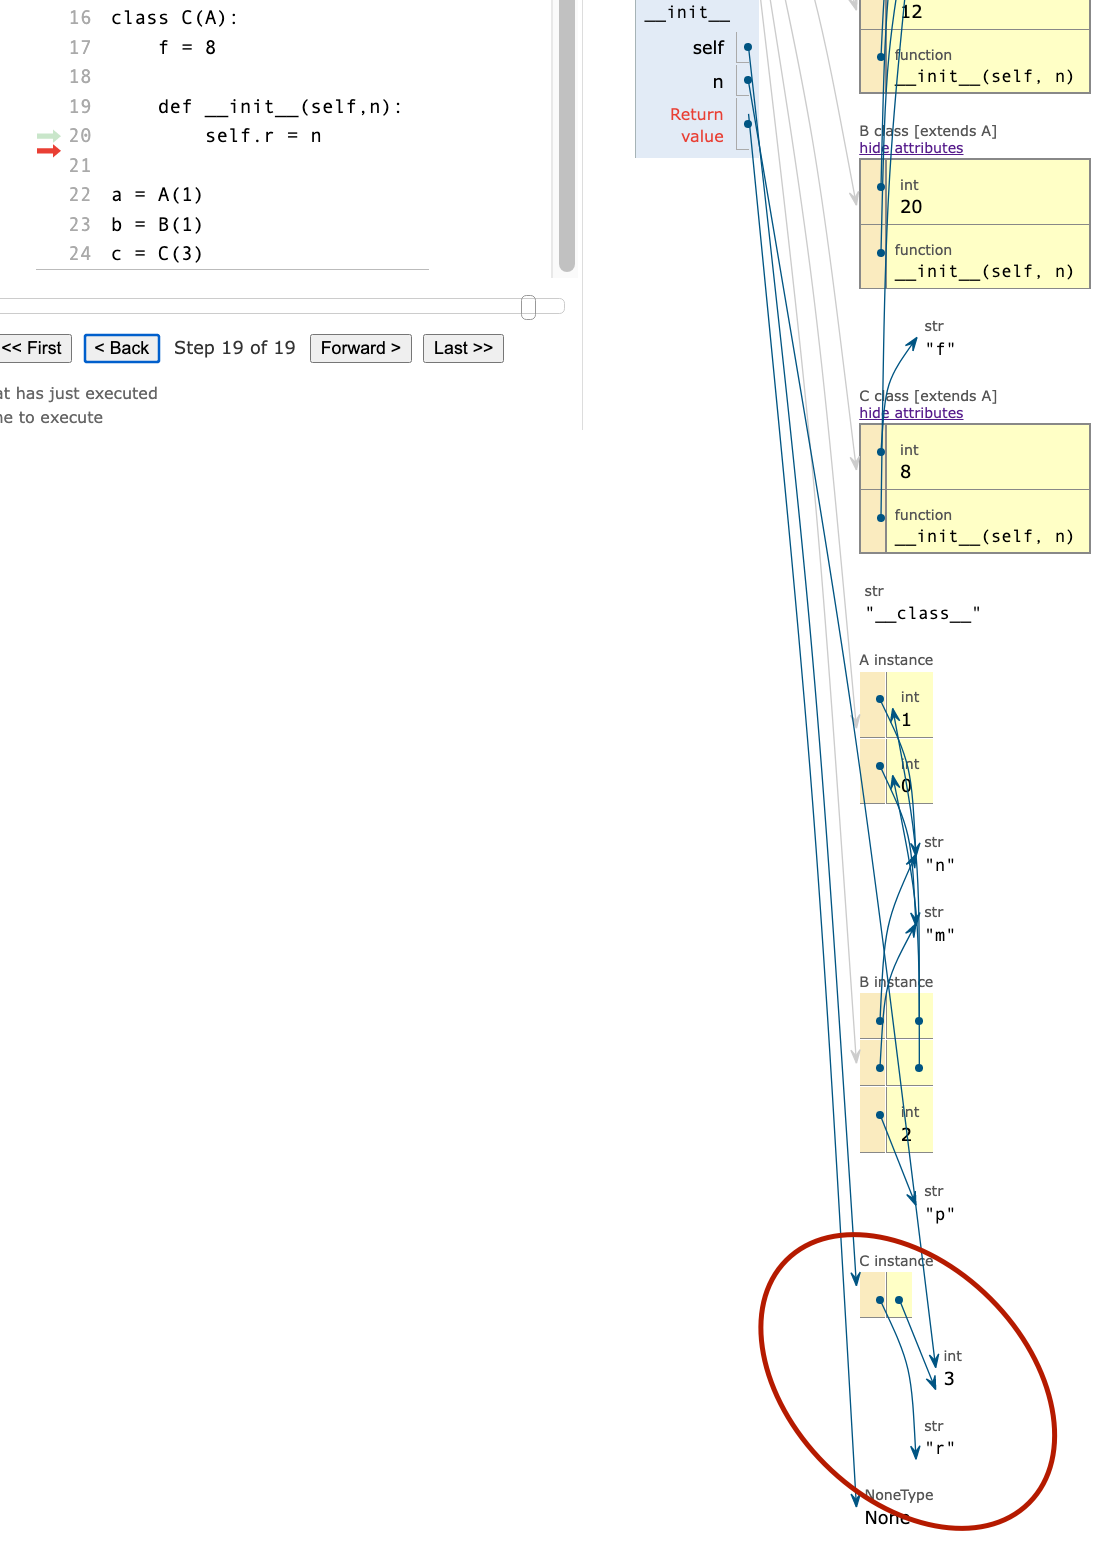

## Problem #3

Q : The below have skeletons of two classes: Time and Event. Event is a subclass of Time, while
Time is only a subclass of object. You are to

    1. Fill in the missing information in each class header.
    2. Add getters and setters as appropriate for the instance attributes
    3. Fill in the parameters of each method (beyond the getters and setters).
    4. Implement each method according to its specification.
    5. Enforce any preconditions in these methods using asserts 

Method __str__ in Time is already completed, but you must finish the header for this method.
All other methods are incomplete. Pay close attention specifications. There are no parameters
beyond the ones specified. If a parameter has a default value, it is listed in the specification.

There are no headers for getters or setters. You are to write those from scratch. You do not
need to write specifications for the getters and setters. Do not write a setter if the class
specification forbids it. Do not use type when writing your asserts.

In [3]:
# Using decorator

class Assertion(object):

    class timeAssert(object):
        def __call__(self, method):
            def wrapper(instance, hour, mins,*args,**kwargs):
                assert ((0 <= hour <= 23) and (0 <= mins <= 59)), "Invalid time format detected"
                res = method(instance, hour, mins,*args,**kwargs)
                return res
            return wrapper

    class nameAssert(object):
        def __call__(self, method):
            # Ignore hour, mins parameter about assertion
            def wrapper(instance, eventname,*args,**kwargs):
                assert eventname, "Eventname should be non-empty string"
                res = method(instance,eventname,*args,**kwargs)
                return res
            return wrapper

In [4]:
class Time(object):
    _hours: int
    _mins: int

    def getter(self):
        return [self._hours, self._mins]

    @Assertion.timeAssert()
    def setter(self, hour, mins):
        self._hours = hour
        self._mins = mins

    @Assertion.timeAssert()
    def __init__(self, hour, mins):
        self._hours = hour
        self._mins = mins

    def __str__(self):
        hrs = str(self._hours) if self._hours > 9 else '0' + str(self._hours)
        mns = str(self._mins) if self._mins > 9 else '0' + str(self._mins)
        return hrs + ':' + mns

    def shift(self, time):
        hour = time // 60
        minute = time % 60
        self._hours = (self._hours + hour + ((self._mins + minute) // 60)) % 24
        self._mins = (self._mins + minute) % 60

In [5]:
a = Time(22,30)

a.shift(170)
print(a)

01:20


In [6]:
class Event(Time):
    _name = ""

    def getter(self):
        return super().getter().append(self._name)

    @Assertion.nameAssert()
    def setter(self, eventname, hour=None, mins=None):
        super().setter(
            super().getter()[0] if not hour else hour,
            super().getter()[1] if not mins else mins
        )
        self._name = eventname

    @Assertion.nameAssert()
    def __init__(self, eventname, hour=12, mins=0):
        super().__init__(hour, mins)
        self._name = eventname

    def __str__(self):
        return f"{self._name}({super().__str__()})"

In [7]:
b = Event("Lunch")
print(b)
b.setter("Dinner",16,20)
print(b)
b.shift(140)
print(b)

Lunch(12:00)
Dinner(16:20)
Dinner(18:40)


## Problem #4

- A. Show the object and class folders that result by running this code
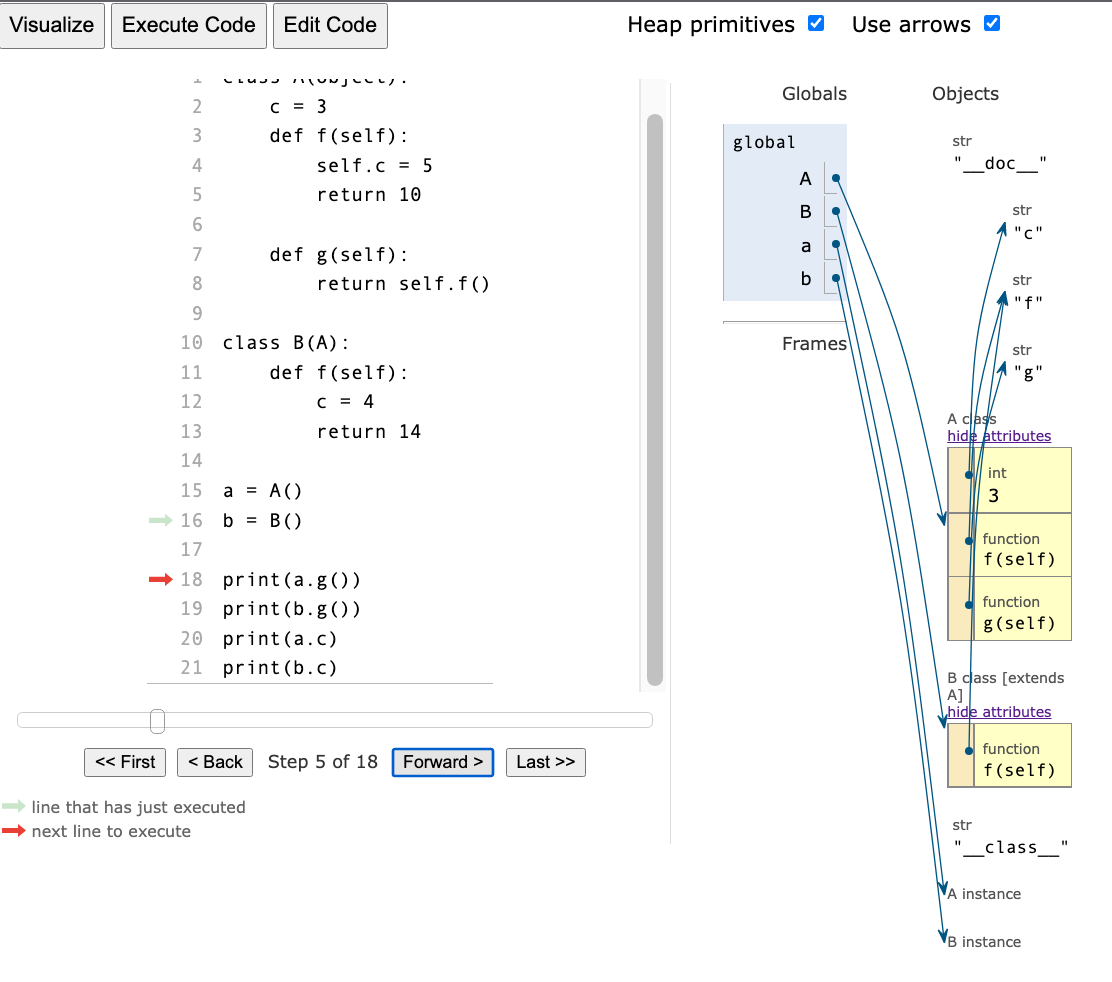
- B. Write down what will get printed by each of the four print statements when they are executed in the order shown.
~~~
10
14
5
3
~~~

In [8]:
class A(object):
    c = 3
    def f(self):
        self.c = 5
        return 10
    
    def g(self):
        return self.f()

class B(A):
    def f(self):
        c = 4
        return 14

In [9]:
a = A()
b = B()

print(a.g())
print(b.g())
print(a.c)
print(b.c)

10
14
5
3


## Problem #5

Make effective use of recursion to implement get_all_prereqs for class Course. Your solution must be recursive. We should have specified the method should return a new list

In [10]:
class Course(object):
    
    def __init__(self,course_num,prereqs):
        self.course_num = course_num
        self.prereqs = prereqs
    
    def get_course_num(self):
        return self.course_num
    
    def get_all_prereqs(self):
        result = list(map(lambda x:x.get_course_num(),self.prereqs))
        # If result is not empty list -> means that there are prereqs
        if result:
            for i in self.prereqs:
                result.extend(i.get_all_prereqs())
        return result

In [11]:
c1 = Course('CS1110', [])
c2 = Course('CS2800', [c1])
c3 = Course('CS2110', [c1])
c4 = Course('CS4820', [c2,c3])

In [12]:
c1.get_all_prereqs()

[]

In [13]:
c2.get_all_prereqs()

['CS1110']

In [14]:
c4.get_all_prereqs()

['CS2800', 'CS2110', 'CS1110', 'CS1110']

## Problem #6

Consider the following code to solve the “Towers of Hanoi” problem. We guarantee there are
no errors. Show the memory contents (call stack and heap space) after each statement from 31 ~ 34.

```python
class Tower(object):
    
    def __init__(self,name,disks):
        self.disks = disks
        self.name = name
    
    def topDisk(self):
        if self.disks == []:
            return None
        else:
            return self.disks[len(self.disks) - 1]
        
    def popTopDisk(self):
        return self.disks.pop(len(self.disks) - 1)
    
    def move(self, to):
        if self.topDisk() is not None:
            isEmpty = to.topDisk() is None
        if isEmpty or to.topDisk() > self.topDisk():
            to.disks.append(self.popTopDisk())a

def plan(source, target, other, num_disks):
    if num_disks == 1:
        source.move(target)
    else:
        plan(source, other, target,num_disks - 1)
        print("Move disk")
        source.move(target)
        plan(other,target,source,num_disks - 1)

left = Tower("left",[2,1])
middle = Tower("middle",[])
right = Tower("right",[])
plan(left,right,middle,len(left.disks))
```

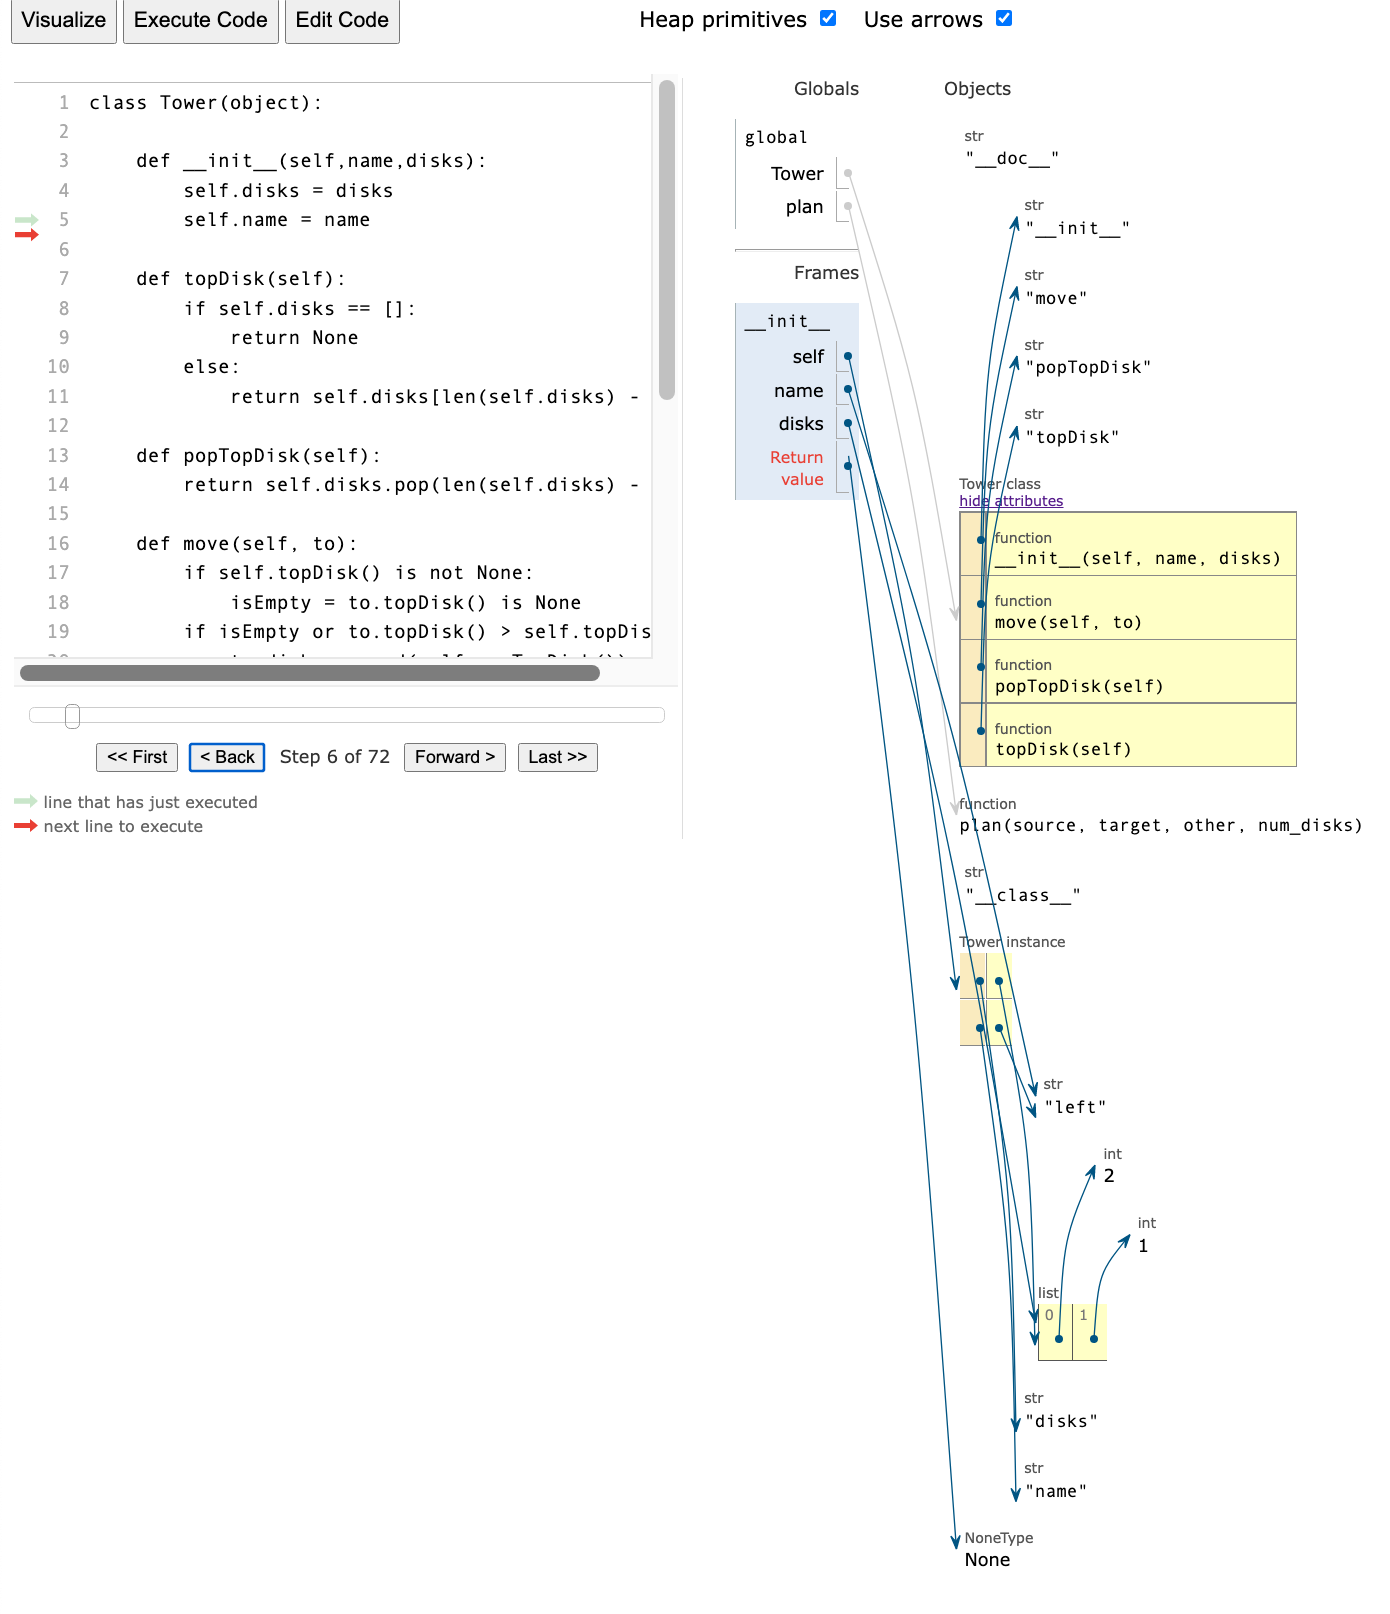
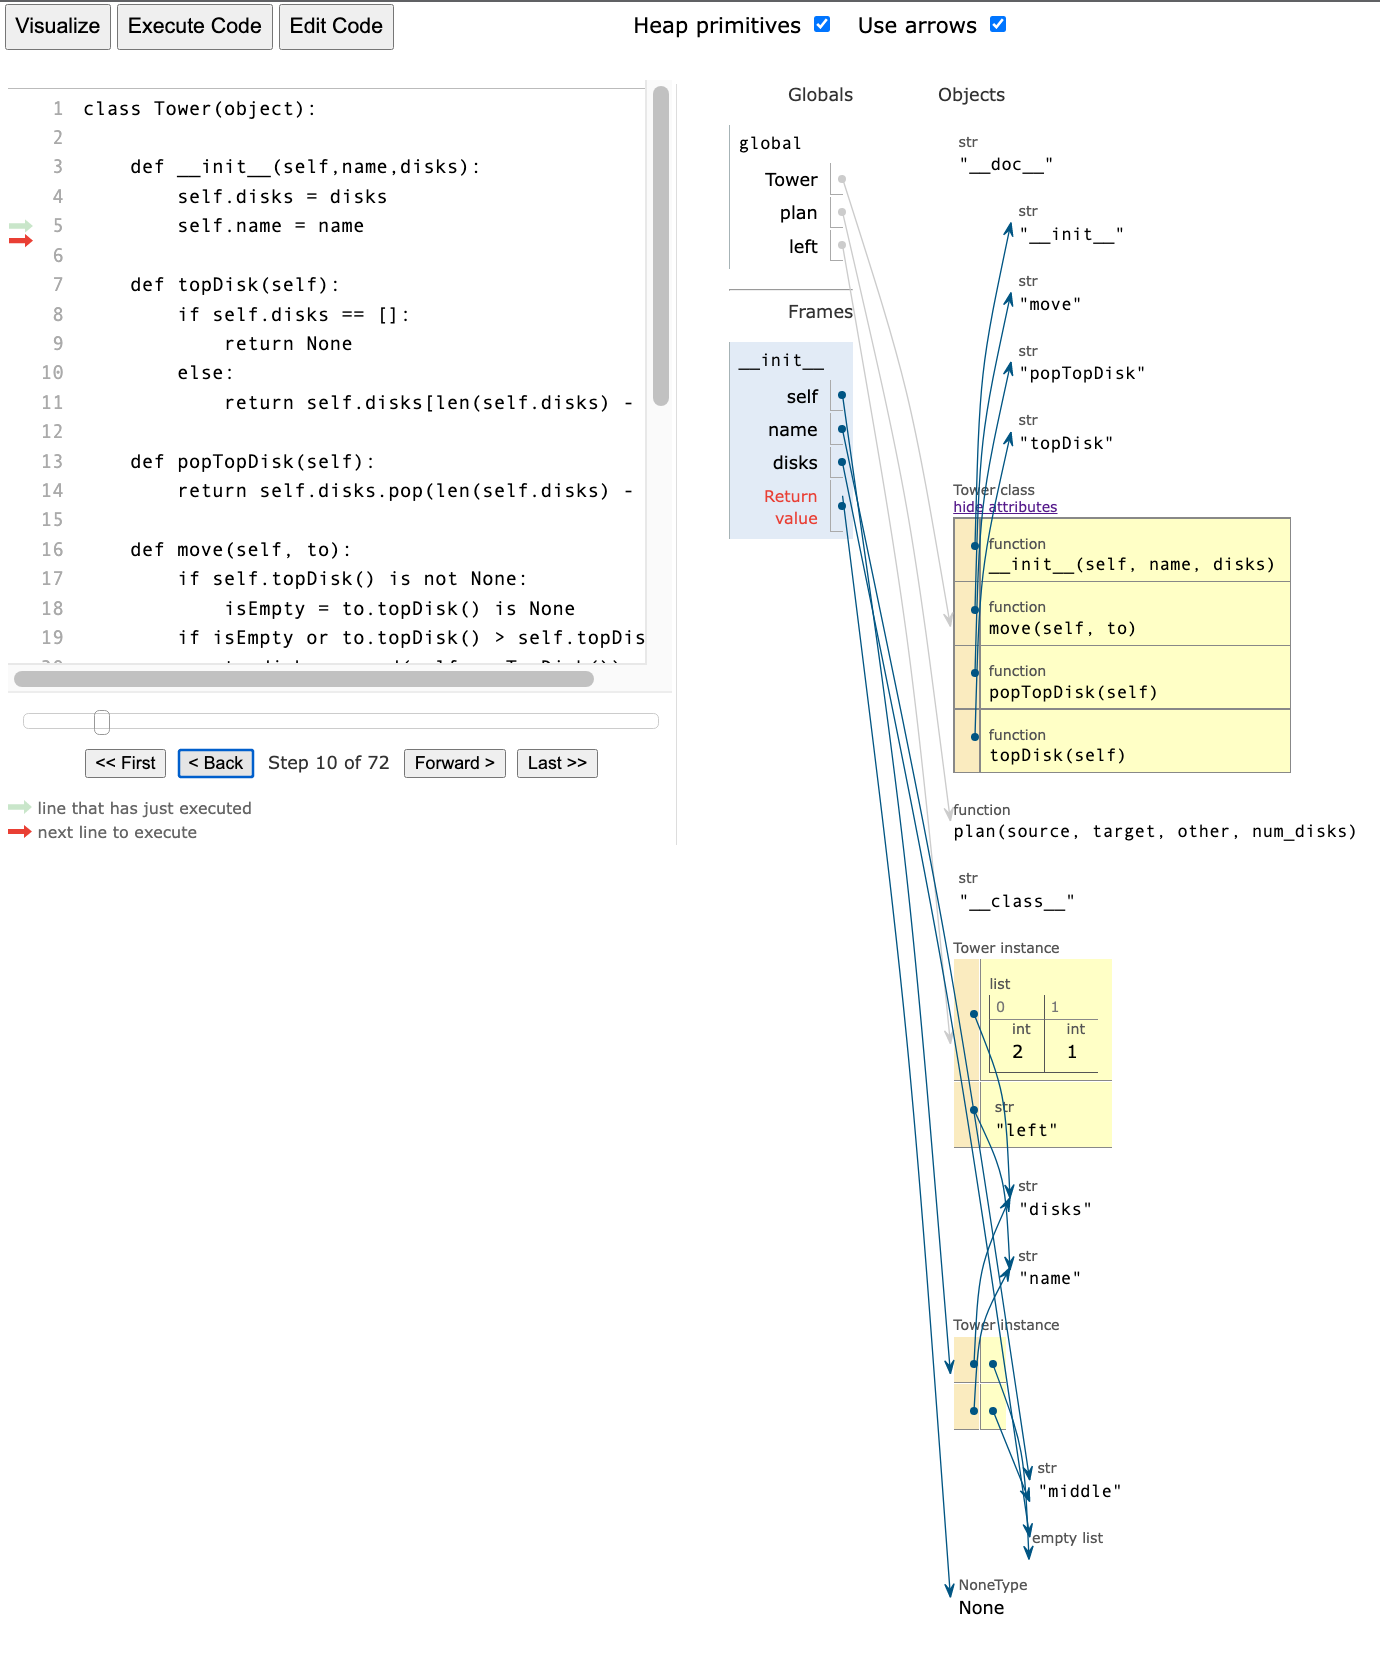
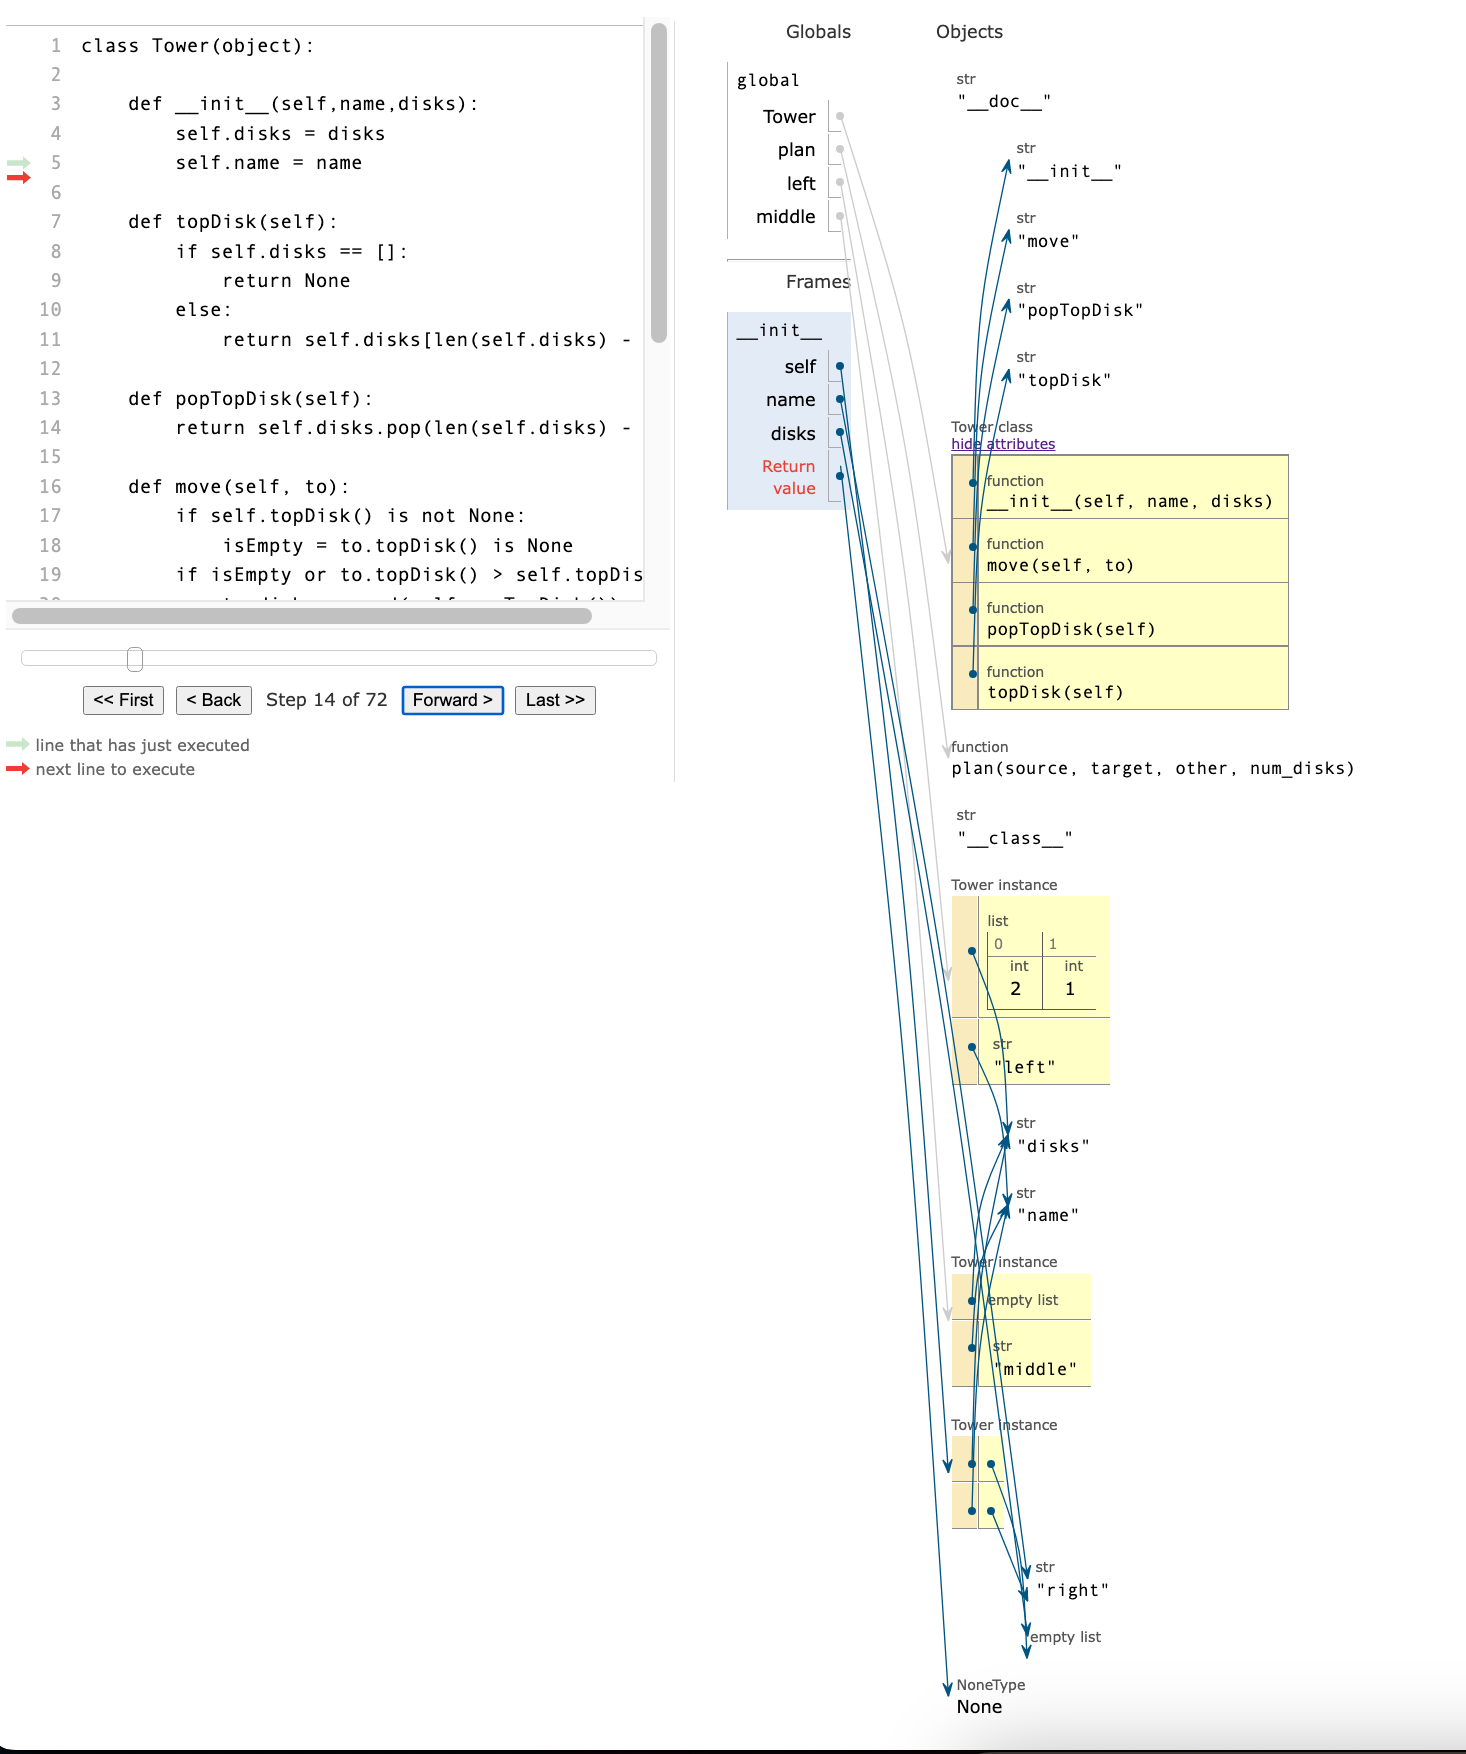
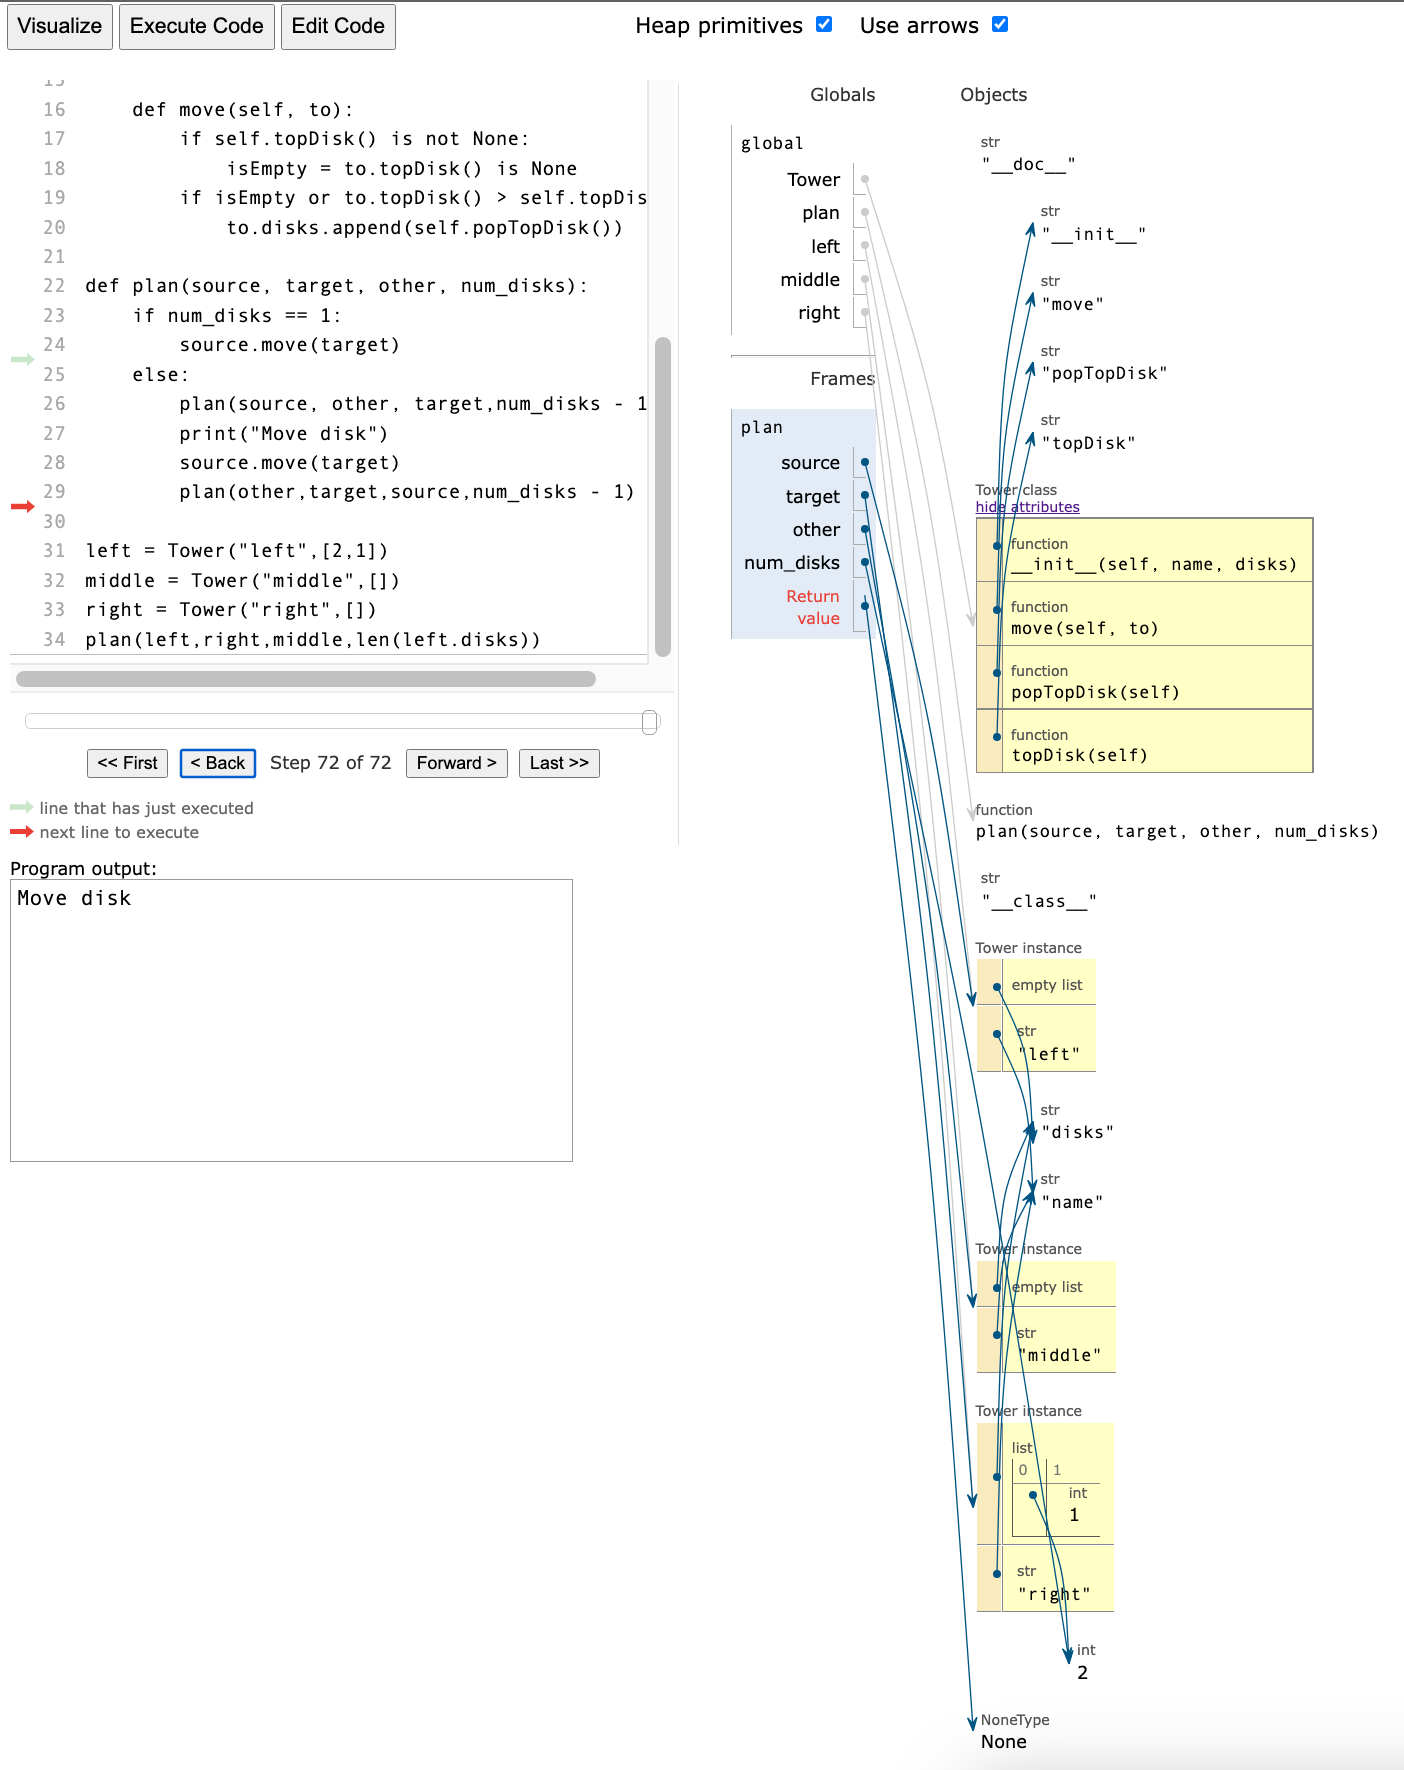